In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
# Loading the datasets
df = pd.read_csv('merged_dataset_04.04.csv')

In [14]:
df.head()

,date,discharge,discharge_max,discharge_min,water_level,water_level_max,water_level_min,om_discharge,soil_moisture_0_to_100cm_mean,soil_moisture_om,soil_moisture_0_to_7cm_mean,precipitation_mm,rain_sum,weather_code,weather_description
0,6/26/2015,6.27,6.41,6.11,29.0,29.0,28.0,1.624219,0.258290,0.266292,0.251417,0.0,0.0,61,"Rain, not freezing, continuous, slight at time..."
1,6/27/2015,6.65,7.94,6.10,30.0,34.0,28.0,1.529298,0.254372,0.258583,0.258417,22.0,7.2,51,"Drizzle, not freezing, continuous, slight at t..."
2,6/28/2015,7.15,7.62,6.68,32.0,33.0,30.0,1.500346,0.252399,0.260167,0.260625,0.0,0.3,51,"Drizzle, not freezing, continuous, slight at t..."
3,6/29/2015,6.51,6.68,6.37,29.0,30.0,29.0,1.437811,0.247408,0.254125,0.245167,0.0,0.3,3,Clouds generally forming or developing
4,6/30/2015,6.17,6.37,5.78,28.0,29.0,27.0,1.376840,0.242139,0.246417,0.232875,0.0,0.0,0,Cloud development not observed or not observable


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discharge,3567.0,5.559190,6.243648,2.740000,3.810000,4.400000,5.370000,162.000000
discharge_max,3567.0,6.235010,8.912792,2.870000,3.900000,4.550000,5.705000,239.000000
discharge_min,3567.0,5.019336,4.177778,1.420000,3.690000,4.250000,5.080000,78.300000
water_level,3567.0,28.244183,11.499230,17.000000,22.000000,25.000000,29.000000,184.000000
water_level_max,3567.0,29.825343,14.012375,18.000000,23.000000,26.000000,31.000000,220.000000
water_level_min,3567.0,26.929352,9.605047,17.000000,22.000000,25.000000,28.000000,126.000000
om_discharge,3567.0,0.837436,0.595209,0.156112,0.312200,0.733804,1.157744,5.011737
soil_moisture_0_to_100cm_mean,3567.0,0.341342,0.051573,0.197806,0.311859,0.348270,0.379212,0.435758
soil_moisture_om,3567.0,0.347181,0.052382,0.181500,0.317500,0.351083,0.387583,0.435958
soil_moisture_0_to_7cm_mean,3567.0,0.348561,0.052270,0.170333,0.318542,0.352083,0.390083,0.435208


In [16]:
# Checking for Missing Values
df.isnull().sum()

date                             0
discharge                        0
discharge_max                    0
discharge_min                    0
water_level                      0
water_level_max                  0
water_level_min                  0
om_discharge                     0
soil_moisture_0_to_100cm_mean    0
soil_moisture_om                 0
soil_moisture_0_to_7cm_mean      0
precipitation_mm                 0
rain_sum                         0
weather_code                     0
weather_description              0
dtype: int64

In [17]:
# Attempt to parse date columns
def parse_dates(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column is object type
            try:
                df[col] = pd.to_datetime(df[col])
                print(f'Parsed {col} as datetime.')
            except ValueError:
                continue  # Skip columns that can't be parsed
    return df

df = parse_dates(df)

# Feature Engineering (Extracting date components)
if any(df.select_dtypes(include=['datetime64']).columns):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col+'_year'] = df[col].dt.year
        df[col+'_month'] = df[col].dt.month
        df[col+'_day'] = df[col].dt.day
        df[col+'_dayofweek'] = df[col].dt.dayofweek
        df[col+'_weekofyear'] = df[col].dt.isocalendar().week

Parsed date as datetime.


/var/folders/kf/4vf9b0_j063c6zf0vs_tltrc0000gn/T/ipykernel_78101/2458341950.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


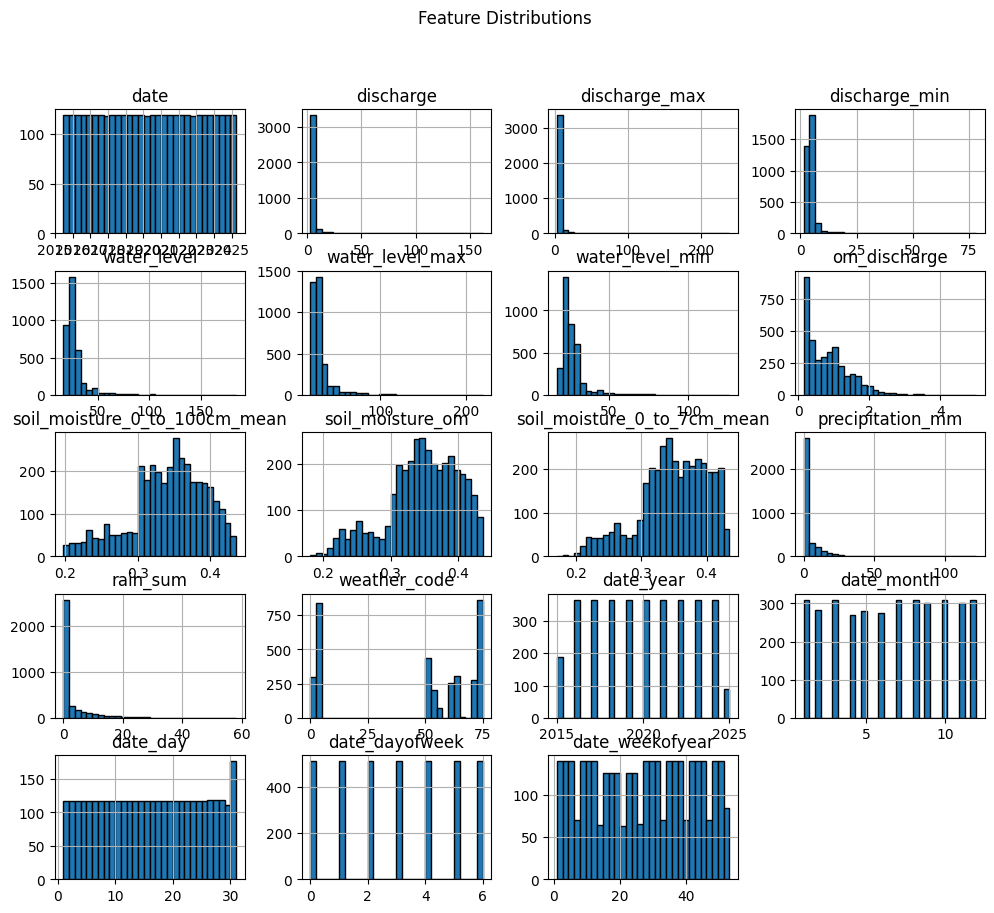

In [18]:
# Histograms of numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

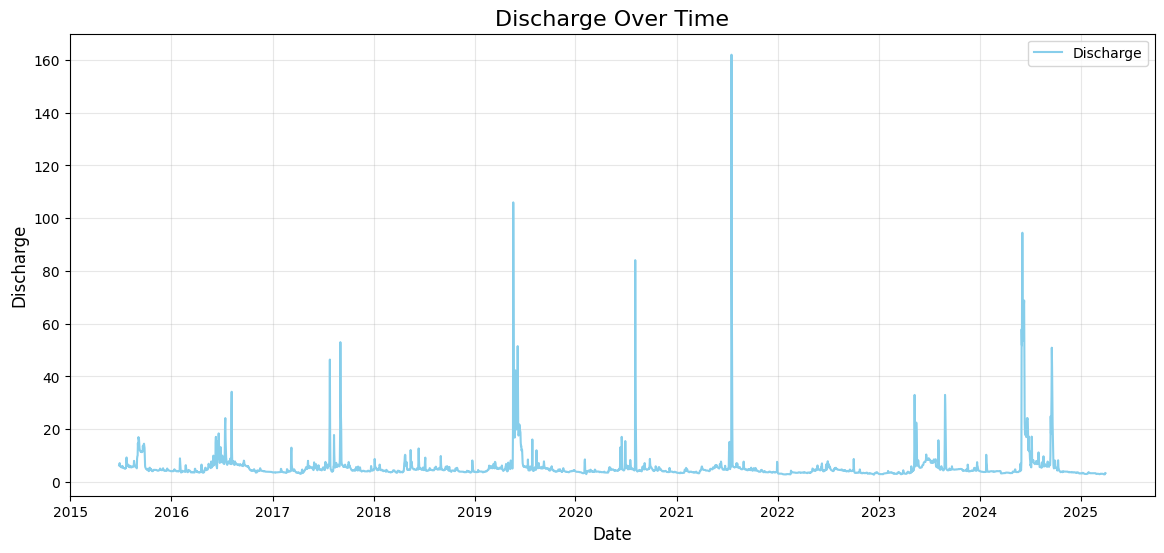

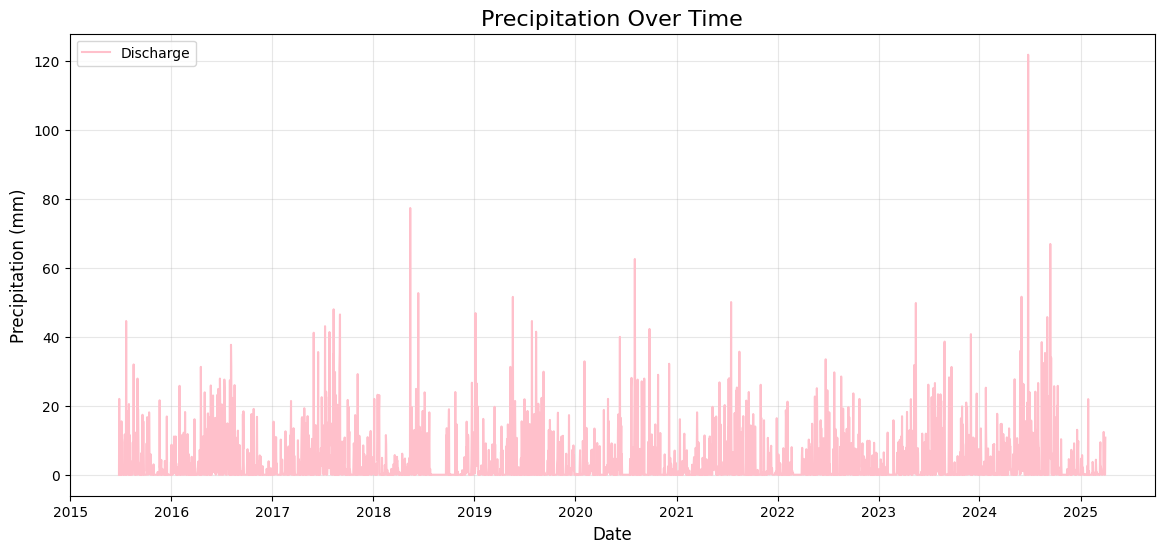

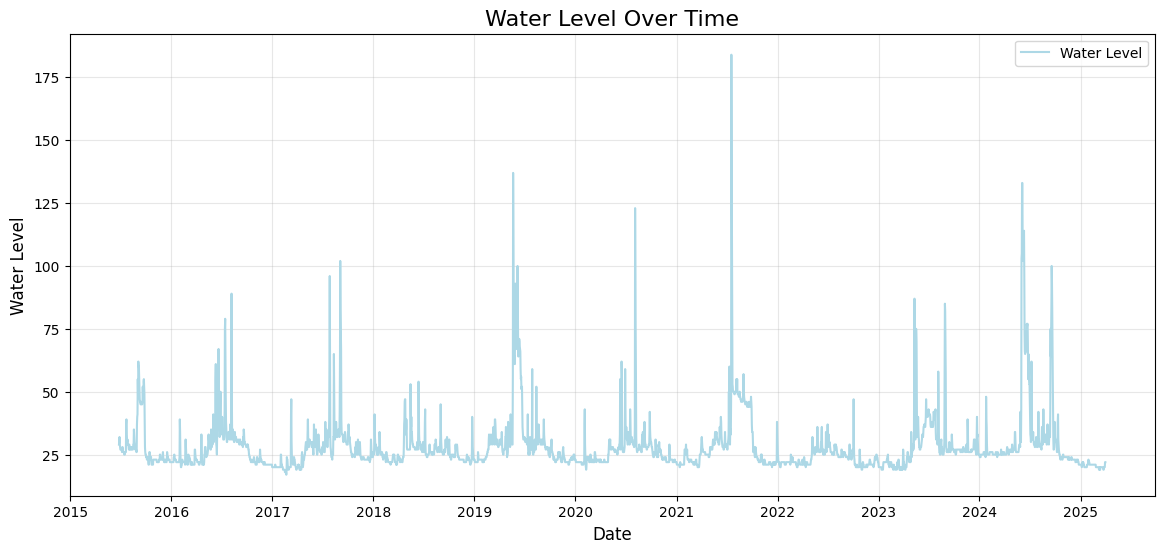

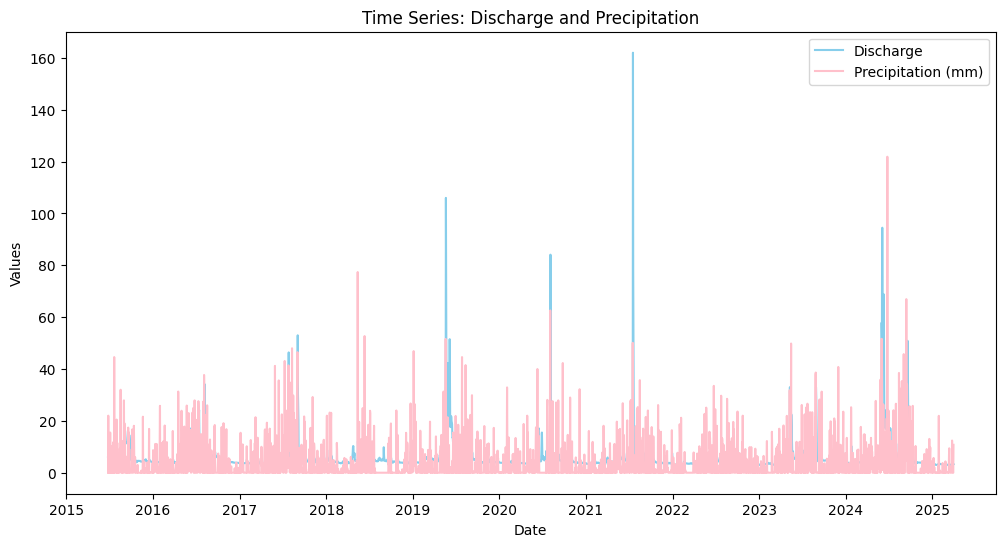

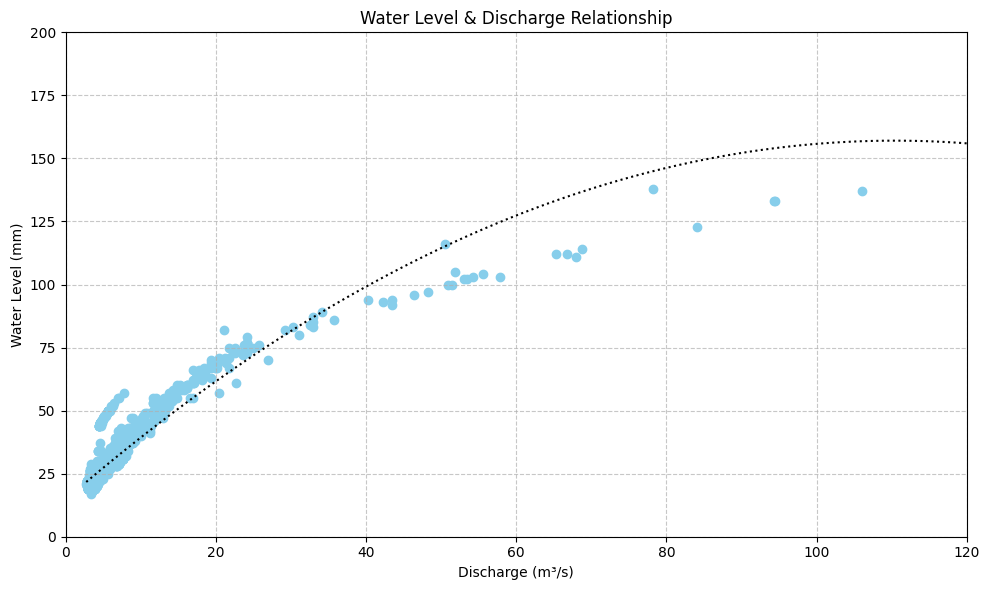

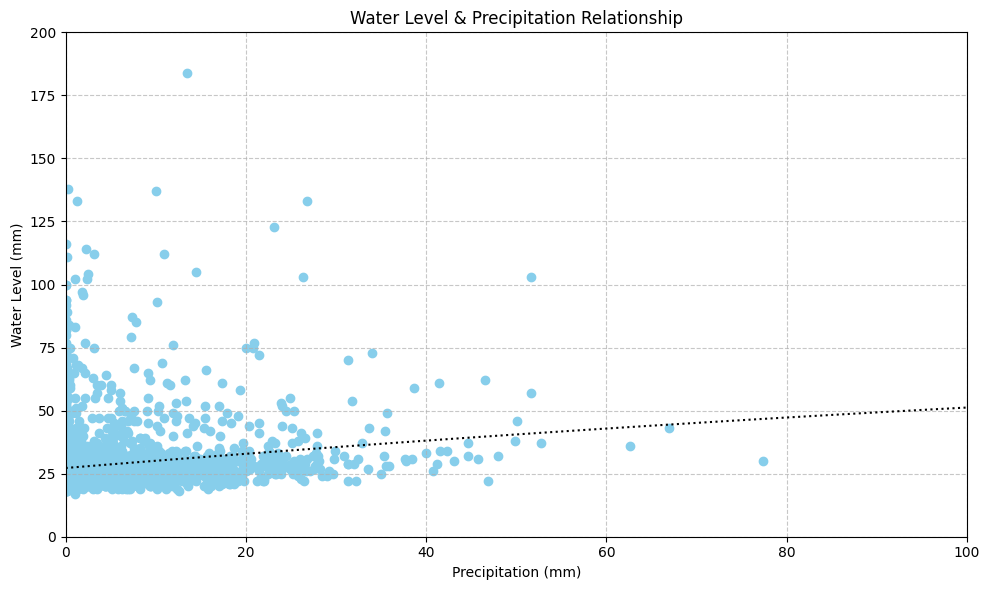

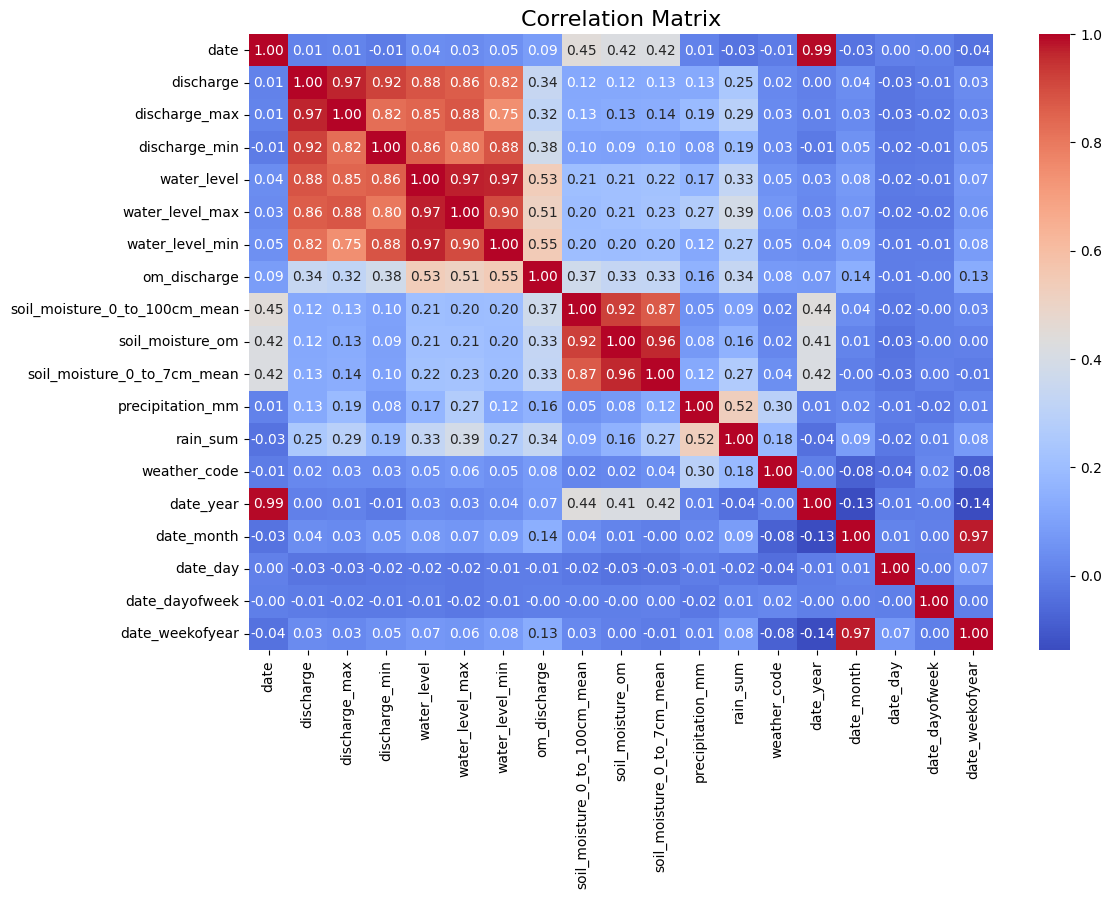

In [19]:
# Visualizing the distribution of "discharge" over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='discharge', color='skyblue', label='Discharge')
plt.title('Discharge Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Distribution of "discharge"
# plt.figure(figsize=(10, 6))
# sns.histplot(df['discharge'], kde=True, color='blue', bins=30)
# plt.title('Distribution of Discharge', fontsize=16)
# plt.xlabel('Discharge', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(alpha=0.3)
# plt.show()


# Visualizing the distribution of "Precipitation" over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='precipitation_mm', color='pink', label='Discharge')
plt.title('Precipitation Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Distribution of "precipitation"
# plt.figure(figsize=(10, 6))
# sns.histplot(df['precipitation_mm'], kde=True, color='green', bins=30)
# plt.title('Distribution of Precipitation', fontsize=16)
# plt.xlabel('Precipitation', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(alpha=0.3)
# plt.show()

# Visualizing the distribution of "water level" over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='water_level', color='lightblue', label='Water Level')
plt.title('Water Level Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Water Level', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Plot discharge and precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['discharge'], label='Discharge', color='skyblue')
plt.plot(df['date'], df['precipitation_mm'], label='Precipitation (mm)', color='pink')
plt.title('Time Series: Discharge and Precipitation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Visualizing the distribution of "Water Level & Discharge" over time
discharge = df['discharge']
water_level = df['water_level']
# Create a figure and axis
plt.figure(figsize=(10, 6))
# This line was missing - it actually plots the data points
plt.scatter(discharge, water_level, color='skyblue')

# Add a trend line
z = np.polyfit(discharge, water_level, 2)
p = np.poly1d(z)
x_trend = np.linspace(min(discharge), max(discharge), 100)
plt.plot(x_trend, p(x_trend), ':', color='black')

plt.xlabel('Discharge (m³/s)')
plt.ylabel('Water Level (mm)')
plt.title('Water Level & Discharge Relationship')

plt.xlim(0, 120)  # Set x-axis limit based on delta_discharge range
plt.ylim(0, 200)  # Set y-axis limit based on your data

# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


# Visualizing the distribution of "Water Level & Precipitation" over time
precipitation = df['precipitation_mm']
water_level = df['water_level']

# Create a figure and axis
plt.figure(figsize=(10, 6))

plt.scatter(precipitation, water_level, color='skyblue')

# Optional: Add a trend line
z = np.polyfit(precipitation, water_level, 2)
p = np.poly1d(z)
x_trend = np.linspace(min(precipitation), max(precipitation), 100)
plt.plot(x_trend, p(x_trend), ':', color='black')

plt.xlabel('Precipitation (mm)')
plt.ylabel('Water Level (mm)')
plt.title('Water Level & Precipitation Relationship')

plt.xlim(0, 100)  # Set x-axis limit based on delta_discharge range
plt.ylim(0, 200)  # Set y-axis limit based on your data
# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


# Correlation matrix
# Drop Weather Description
df = df.drop(columns=['weather_description'])
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [188]:
list_of_columns = df.columns.tolist()
list_of_columns

['date',
 'discharge',
 'discharge_max',
 'discharge_min',
 'water_level',
 'water_level_max',
 'water_level_min',
 'om_discharge',
 'soil_moisture_0_to_100cm_mean',
 'soil_moisture_om',
 'soil_moisture_0_to_7cm_mean',
 'precipitation_mm',
 'rain_sum',
 'weather_code',
 'date_year',
 'date_month',
 'date_day',
 'date_dayofweek',
 'date_weekofyear']

In [189]:
# Drop not needed colums
df = df.drop(['discharge_max', 'discharge_min', 'water_level', 'water_level_max', 'water_level_min', 'om_discharge', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 'rain_sum', 'weather_code', 'date_year', 'date_month', 'date_day', 'date_dayofweek', 'date_weekofyear'], axis=1)
df.head()

,date,discharge,soil_moisture_om,precipitation_mm
0,2015-06-26,6.27,0.266292,0.0
1,2015-06-27,6.65,0.258583,22.0
2,2015-06-28,7.15,0.260167,0.0
3,2015-06-29,6.51,0.254125,0.0
4,2015-06-30,6.17,0.246417,0.0


In [190]:
# Cumulative Precipitation  
# The cumulative precipitation is calculated as the sum of the daily precipitation values over time. 
# The formula for cumulative precipitation is:
# Q_cum(n) = Q_cum(n-1) + Q(n)
# Cumulative precipitation on Day n = Cumulative precipitation on Day n-1 + precipitation on day n 
df['precipitation_cum'] = df['precipitation_mm'].cumsum()
# Reorder the columns to place 'discharge_cum' after 'discharge_mean'
columns = df.columns.tolist()
columns.insert(columns.index('precipitation_mm') + 1, columns.pop(columns.index('precipitation_mm')))

df = df[columns]
print(df)

           date  discharge  soil_moisture_om  precipitation_cum  \
0    2015-06-26       6.27          0.266292               0.00   
1    2015-06-27       6.65          0.258583              22.00   
2    2015-06-28       7.15          0.260167              22.00   
3    2015-06-29       6.51          0.254125              22.00   
4    2015-06-30       6.17          0.246417              22.00   
...         ...        ...               ...                ...   
3562 2025-03-27       2.92          0.356792           12528.34   
3563 2025-03-28       2.89          0.353417           12530.73   
3564 2025-03-29       2.92          0.348208           12530.73   
3565 2025-03-30       3.42          0.348708           12530.73   
3566 2025-03-31       3.33          0.351250           12541.49   

      precipitation_mm  
0                 0.00  
1                22.00  
2                 0.00  
3                 0.00  
4                 0.00  
...                ...  
3562              0.

In [191]:
# Cumulative Discharge
# The cumulative discharge is calculated as the sum of the daily discharge values over time. The formula for cumulative discharge is:
# Q_cum(n) = Q_cum(n-1) + Q(n)
# Cumulative Cischarge on Day n = Cumulative Discharge on Day n-1 + Discharge on day n 
df['discharge_cum'] = df['discharge'].cumsum()
# Reorder the columns to place 'discharge_cum' after 'discharge_mean'
columns = df.columns.tolist()
columns.insert(columns.index('discharge') + 1, columns.pop(columns.index('discharge')))

df = df[columns]
print(df)

           date  soil_moisture_om  discharge  precipitation_cum  \
0    2015-06-26          0.266292       6.27               0.00   
1    2015-06-27          0.258583       6.65              22.00   
2    2015-06-28          0.260167       7.15              22.00   
3    2015-06-29          0.254125       6.51              22.00   
4    2015-06-30          0.246417       6.17              22.00   
...         ...               ...        ...                ...   
3562 2025-03-27          0.356792       2.92           12528.34   
3563 2025-03-28          0.353417       2.89           12530.73   
3564 2025-03-29          0.348208       2.92           12530.73   
3565 2025-03-30          0.348708       3.42           12530.73   
3566 2025-03-31          0.351250       3.33           12541.49   

      precipitation_mm  discharge_cum  
0                 0.00           6.27  
1                22.00          12.92  
2                 0.00          20.07  
3                 0.00          26.

In [192]:
# Adding a new column "delta_discharge" to calculate the difference in discharge_cum
df['delta_discharge'] = df['discharge_cum'].diff() 
df['delta_discharge'] = df['delta_discharge'].fillna(0) 

# Adding a new column "delta_discharge" to calculate the difference in discharge_cum
df['delta_precipitation'] = df['precipitation_cum'].diff() 
df['delta_precipitation'] = df['delta_precipitation'].fillna(0) 
df

,date,soil_moisture_om,discharge,precipitation_cum,precipitation_mm,discharge_cum,delta_discharge,delta_precipitation
0,2015-06-26,0.266292,6.27,0.00,0.00,6.27,0.00,0.00
1,2015-06-27,0.258583,6.65,22.00,22.00,12.92,6.65,22.00
2,2015-06-28,0.260167,7.15,22.00,0.00,20.07,7.15,0.00
3,2015-06-29,0.254125,6.51,22.00,0.00,26.58,6.51,0.00
4,2015-06-30,0.246417,6.17,22.00,0.00,32.75,6.17,0.00
...,...,...,...,...,...,...,...,...
3562,2025-03-27,0.356792,2.92,12528.34,0.16,19817.07,2.92,0.16
3563,2025-03-28,0.353417,2.89,12530.73,2.39,19819.96,2.89,2.39
3564,2025-03-29,0.348208,2.92,12530.73,0.00,19822.88,2.92,0.00
3565,2025-03-30,0.348708,3.42,12530.73,0.00,19826.30,3.42,0.00


In [193]:
# saving the dataset as csv file
df.to_csv('dataset.hydro_delta.csv', index=False)

Merge the Dataset | dataset.hydro_delta.csv | with the dataset regarding satellite images. 

Steps:
Import datetime
Upload the data

In [194]:
from datetime import datetime 

In [195]:
# Load satellite metadata and parse timestamp
df_satellite = pd.read_csv('satellite_images.csv', parse_dates=['timestamp'])

# Load hydro dataset and parse date
df_hydro = pd.read_csv(
    'dataset.hydro_delta.csv',
    parse_dates=['date'],
    dayfirst=False  # Adjust if dates are in DD/MM/YYYY format
)

In [196]:
# Check date ranges
print("Satellite date range:", df_satellite['timestamp'].min(), "to", df_satellite['timestamp'].max())
print("Hydro date range:", df_hydro['date'].min(), "to", df_hydro['date'].max())

Satellite date range: 2017-04-24 00:00:00 to 2025-03-18 00:00:00
Hydro date range: 2015-06-26 00:00:00 to 2025-03-31 00:00:00


In [197]:
# Merge datasets using left join on timestamp and date, then drop the redundant 'date' column
merged_df = pd.merge(
    df_satellite,
    df_hydro,
    left_on='timestamp',
    right_on='date',
    how='left'
).drop(columns=['date']).sort_values('timestamp').reset_index(drop=True)

In [198]:
# Calculate 'extreme_precipitation' column
merged_df['extreme_precipitation'] = 0

for i in range(len(merged_df)):
    current_ts = merged_df.at[i, 'timestamp']
    start_ts = merged_df.at[i-1, 'timestamp'] if i > 0 else pd.Timestamp.min
    
    # Filter hydro data between start_ts and current_ts
    mask = (
        (df_hydro['date'] > start_ts) & 
        (df_hydro['date'] <= current_ts) & 
        (df_hydro['precipitation_mm'] >= 50)
    )
    merged_df.at[i, 'extreme_precipitation'] = df_hydro.loc[mask, 'precipitation_mm'].count()

# Check results
print(merged_df[['timestamp', 'extreme_precipitation']])


     timestamp  extreme_precipitation
0   2017-04-24                      0
1   2017-05-17                      0
2   2017-05-27                      0
3   2017-06-13                      0
4   2017-06-26                      0
..         ...                    ...
242 2024-11-11                      0
243 2024-11-16                      0
244 2024-11-18                      0
245 2025-03-18                      0
246 2025-03-18                      0

[247 rows x 2 columns]


In [199]:
# Calculate 'extreme_discharge' column
merged_df['extreme_discharge'] = 0

for i in range(len(merged_df)):
    current_ts = merged_df.at[i, 'timestamp']
    start_ts = merged_df.at[i-1, 'timestamp'] if i > 0 else pd.Timestamp.min
    
    # Filter hydro data between start_ts and current_ts
    mask = (
        (df_hydro['date'] > start_ts) & 
        (df_hydro['date'] <= current_ts) & 
        (df_hydro['discharge'] >= 12)
    )
    merged_df.at[i, 'extreme_discharge'] = df_hydro.loc[mask, 'discharge'].count()

# Check results
print(merged_df[['timestamp', 'extreme_discharge']])

     timestamp  extreme_discharge
0   2017-04-24                 30
1   2017-05-17                  0
2   2017-05-27                  0
3   2017-06-13                  0
4   2017-06-26                  0
..         ...                ...
242 2024-11-11                  0
243 2024-11-16                  0
244 2024-11-18                  0
245 2025-03-18                  0
246 2025-03-18                  0

[247 rows x 2 columns]


In [200]:
merged_df.columns

Index(['system:index', 'image_id', 'timestamp', '.geo', 'soil_moisture_om',
       'discharge', 'precipitation_cum', 'precipitation_mm', 'discharge_cum',
       'delta_discharge', 'delta_precipitation', 'extreme_precipitation',
       'extreme_discharge'],
      dtype='object')

In [201]:
# Drop unnecessary columns 
merged_dataset = merged_df.drop(['precipitation_cum', 'discharge_cum', 'delta_discharge', 'delta_precipitation',], axis=1)
merged_dataset.head()

,system:index,image_id,timestamp,.geo,soil_moisture_om,discharge,precipitation_mm,extreme_precipitation,extreme_discharge
0,20170424T101031_20170424T101120_T32TPT,0,2017-04-24,"{""type"":""MultiPoint"",""coordinates"":[]}",0.374958,3.91,0.0,0,30
1,20170517T102031_20170517T102352_T32TPT,1,2017-05-17,"{""type"":""MultiPoint"",""coordinates"":[]}",0.385208,5.49,0.0,0,0
2,20170527T102031_20170527T102301_T32TPT,2,2017-05-27,"{""type"":""MultiPoint"",""coordinates"":[]}",0.374167,5.01,0.0,0,0
3,20170613T101031_20170613T101608_T32TPT,3,2017-06-13,"{""type"":""MultiPoint"",""coordinates"":[]}",0.348667,4.56,0.0,0,0
4,20170626T102021_20170626T102321_T32TPT,4,2017-06-26,"{""type"":""MultiPoint"",""coordinates"":[]}",0.322125,4.52,3.0,0,0


There are three datasets in this notebook. 
1. merged_dataset_04.04.csv | the extracted raw data from the GKD and and OpenMeteo
2. dataset.hydro_delta.csv | Δ values of discharge and precipitation have been added in the exogenous dataset.
3. final_dataset.csv | Extreme event values has been added and merged with satellite images data. 

In [161]:
# Saving the final dataframe to a CSV file
merged_dataset.to_csv('final_dataset.csv', index=False)
print("New dataset 'final_dataset.csv' created successfully!")

New dataset 'final_dataset.csv' created successfully!
